# 列表

## 列表操作

Python列表是对象的有序集合。列表的元素用逗号分隔开来，整个列表则使用方括号括起来：

In [68]:
num_list = [1, 2, 3, 4]
type(num_list)

list

列表是可变的，并且也可以有重复的元素。

列表中的对象类型并不需要是完全一致的：

In [69]:
name = ['yejiu', '1997-03-02', 'master', 26, ['anoter list']]

但是通常来啊经一个列表中所存储的对象是具有一定的关系的。

列表可以被创建，并且不包含任何的对象。

In [70]:
empty_list = []

列表可以使用 append() 函数来添加新的元素，并且这个元素会被添加在列表的末尾：

In [71]:
empty_list

[]

In [72]:
# append()
empty_list.append("no empty now")
empty_list

['no empty now']

In [73]:
# 在末尾进行添加
empty_list.append("add a new object at the end of that list")
empty_list

['no empty now', 'add a new object at the end of that list']

我们可以使用索引来对列表中的对象进行访问：

In [74]:
# python的索引从0开始
num_list = [0, 1, 2, 3, 4, 5]
num_list[0]

0

In [75]:
# 可以从后往前索引
num_list[-1]

5

In [76]:
# 从后往前的第二个元素
num_list[-2]

4

我们可以使用index()来进行索引，这个函数会返回对象中第一个符合要求的对象的索引位置：

In [77]:
num_list_with_same_elemtns = [0, 1, 2, 3, 4, 5, 5, 5]
num_list_with_same_elemtns.index(5)  # 返回第一个5的index

5

insert()函数可以在置顶的位置插入一个新的元素：

In [78]:
num_list_insert = [1, 2, 3, 5]
num_list_insert.insert(3, 'insert number: 4')
num_list_insert

[1, 2, 3, 'insert number: 4', 5]

从结果可以来看，index为3的位置的元素和之后的元素都会被往后平移，而index为3的位置被插入的元素填充。

count()函数可以用来统计列表中的某一个元素的数量：

In [79]:
num_list_count = [1, 1, 1, 2, 3, 4, 5]
num_list_count.count(1)

3

如果要访问一系列的数据，则可以使用切片符号来进行操作：

In [80]:
num_list_slice = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [81]:
num_list_slice[0:3]

[0, 1, 2]

In [82]:
num_list_slice[0:6:2]

[0, 2, 4]

In [83]:
# 使用 : 可以打印所有的元素
num_list_slice[:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [84]:
# 在使用 : 的同时可以使用 -1 来指定步长，从而实现列表的翻转
num_list_slice[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

len()可以返回列表的长度：

In [85]:
len(num_list_slice)

11

可以使用del和切片相结合来删除一部分元素：

In [86]:
del num_list_slice[10:]

In [87]:
num_list_slice

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Python遵守的是左闭右开的原则，即括号的左边的数字是被包括的，但是括号的右边的数字是不被包括的。

## 列表实现队列和栈

**队列**

队列是一种数据结构类型：

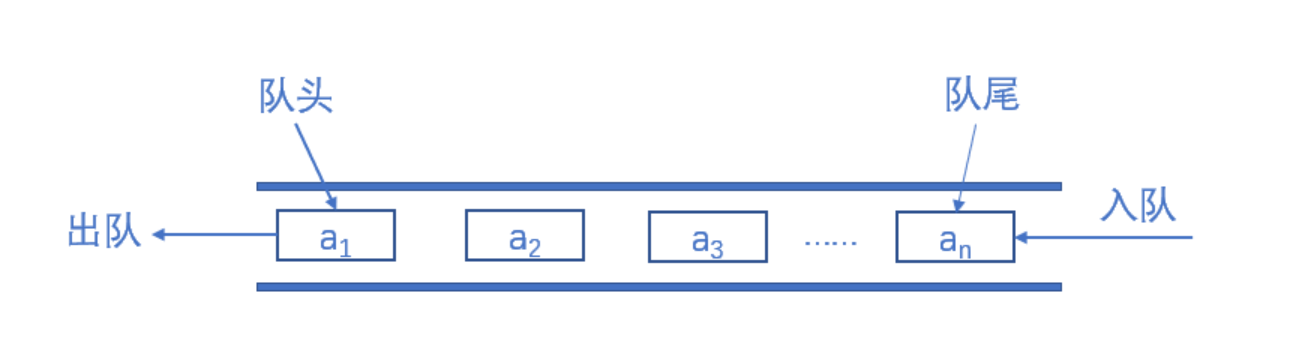

遵守的原则是：先入先出，后入后出。

Python提供了一个标准库：deque，也就是double-ended queue。通过这个标准库可以将对象变成队列。

In [88]:
from collections import deque
my_list = ['last in', 'mid in', 'first in']
queue = deque(my_list)

In [89]:
# 查看类型
type(queue)

collections.deque

In [90]:
# 开始从右边弹出一个元素，用来模拟 入队
queue.append('append in')
# 然后从左边弹出一个元素，用来模拟 出队
queue.popleft()
# 打印以下queue
print(queue)

deque(['mid in', 'first in', 'append in'])


**栈**

栈的逻辑如下所示：

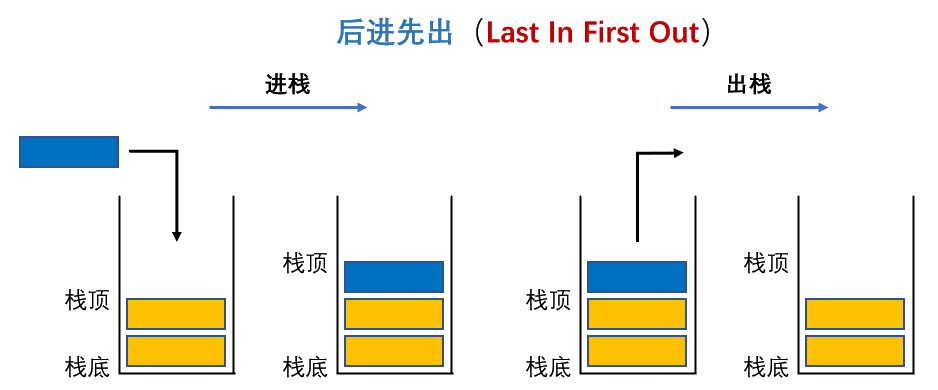

遵守的原则是：先入后出，后入先出。

与队列一样，栈也是一种抽象的数据结构，由于先入先出，所以只需要使用list的append()函数和pop()函数就可以了。

In [91]:
my_list = ['last name', 'middle name', 'first name']

stack = []

for task in my_list:
    stack.append(task)
while stack:
    print(stack.pop(), ' ~ Done!')

print("\n That task is empty")

first name  ~ Done!
middle name  ~ Done!
last name  ~ Done!

 That task is empty


## 使用列表和栈来进行自然语言处理

**一个例子**

In [92]:
import spacy

txt = 'List is a ubiquitous data structure in the Python programming language.'

nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)
stk = []

for w in doc:
    if w.pos_ == "NOUN" or w.pos_ == "PROPN":
        stk.append(w.text)
    elif (w.head.pos_ == "NOUN" or w.head.pos_ == "PROPN") and (w in w.head.lefts):
        stk.append(w.text)
    elif stk:
        chunk = ""
        while stk:
            chunk = stk.pop() + ' ' + chunk
        print(chunk.strip())

List
a ubiquitous data structure
the Python programming language


这段代码是使用Python的spaCy库来对一段文本进行处理。spaCy是一个用于自然语言处理的开源库，提供了很多方便的功能，包括词性标注、命名实体识别等。

下面是对这段代码的逐行解释：

1. import spacy：导入spaCy库。
2. txt = 'List is a ubiquitous data structure in the Python programming language.'：定义一个字符串txt，这是我们要处理的文本。
3. nlp = spacy.load('en_core_web_sm')：加载spaCy的英文模型，用于对英文文本进行处理。
4. doc = nlp(txt)：使用上面加载的模型来处理txt字符串，得到一个spaCy文档对象。
5. stk = []：初始化一个空列表stk，用于存储某些特定类型的词。
6. for w in doc:：遍历文档中的每一个词。
7. if w.pos_ == "NOUN" or w.pos_ == "PROPN":：如果词的词性是名词（NOUN）或专有名词（PROPN），则将其加入到stk列表中。
8. elif (w.head.pos_ == "NOUN" or w.head.pos_ == "PROPN") and (w in w.head.lefts):：如果当前词的父节点的词性是名词或专有名词，并且当前词是其父节点的左子节点，则也将其加入到stk列表中。
9. elif stk:：如果stk列表不为空，则执行下面的代码。
10. chunk = ""：初始化一个空字符串chunk，用于存储连续的名词或专有名词。
11. while stk:：当stk列表还有词时，执行下面的代码。
12. chunk = stk.pop() + ' ' + chunk：从stk列表中弹出一个词，将其与当前的chunk拼接，并将结果重新赋值给chunk。
13. print(chunk.strip())：打印处理后的连续名词或专有名词。

总的来说，这段代码的目的是从给定的文本中提取出连续的名词和专有名词，并将它们打印出来。例如，对于给定的文本"List is a ubiquitous data structure in the Python programming language."，输出的结果应该是"List Python"。

**改写成推导式**

In [93]:
txt = 'List is a ubiquitous data structure in the Python programming language.'

import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)

for t in doc:
    print(t.text, t.head.text)

List is
is is
a structure
ubiquitous structure
data structure
structure is
in structure
the language
Python language
programming language
language in
. is


修改成推导式：

In [94]:
txt = 'List is a ubiquitous data structure in the Python programming language.'

import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)
head_lefts = [t.text if t in t.head.lefts else 0 for t in doc]

print(head_lefts)

['List', 0, 'a', 'ubiquitous', 'data', 0, 0, 'the', 'Python', 'programming', 0, 0]


In [95]:
for w in doc:
    head_lefts = [t.text if t in t.head.lefts else 0 for t in doc[w.i:]]
    print(head_lefts)

['List', 0, 'a', 'ubiquitous', 'data', 0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 'a', 'ubiquitous', 'data', 0, 0, 'the', 'Python', 'programming', 0, 0]
['a', 'ubiquitous', 'data', 0, 0, 'the', 'Python', 'programming', 0, 0]
['ubiquitous', 'data', 0, 0, 'the', 'Python', 'programming', 0, 0]
['data', 0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 'the', 'Python', 'programming', 0, 0]
['the', 'Python', 'programming', 0, 0]
['Python', 'programming', 0, 0]
['programming', 0, 0]
[0, 0]
[0]


# 元组

## 元组与列表

元组与列表一样是有序集合，但是元组一旦被生成就不可以发生改变了。

In [96]:
tuple_01 = (0, "1", 2, "3")

In [97]:
tuple_01[0]

0

In [98]:
# 修改会发生报错
try:
    tuple_01[0] = 'change'
except TypeError as e:
    print(f"发生错误：{e}")

发生错误：'tuple' object does not support item assignment


或者我们可以尝试一个稍微复杂一点儿的嵌套数据：

In [99]:
# 一个 to-do list
task_list = ['Peter Bill', "Tidy Smith", "Walk the dog", "Go to the bed"]
task_time = ['8:00', '8:30', '9:00', '9:30']

# 使用列表推导式和zip函数
shed_list = [(tm, task) for tm, task in zip(task_time, task_list)]

# 输入一下看一下
shed_list

[('8:00', 'Peter Bill'),
 ('8:30', 'Tidy Smith'),
 ('9:00', 'Walk the dog'),
 ('9:30', 'Go to the bed')]

由于元组是不变的，所以如果任务的时间可能被修改，则不应该采用元组作为数据结构。

# 字典

**字典的属性**

字典是Python中的另一种广泛使用的内置数据结构。字典是键值对的可变无序集合，其中键的名称是不可以重复的，每个键对应一个值。

In [100]:
dic_01 = {"key_01":"value_01", "key_02":"value_02"}

In [101]:
dic_01["key_01"]

'value_01'

我们可以将字典嵌套在别的数据结构中，比如说列表：

In [102]:
dict_list = [
    {'time':'8:00', 'name':'Pay Bills'},
    {'time':'8:30', 'name':'Go to school'},
    {'time':'9:00', 'name':'Walk the dog'},
    {'time':'9:30', 'name':'Go to the Mountain'},
    {'time':'10:00', 'name':'Cook Lunch'}
]

In [103]:
dict_list[1]['time']  # 先指出来是第几个列表，然后再使用键来访问值

'8:30'

**setdefault()函数**

In [104]:
# 首先是一个car字典
car = {
    'brand' : 'Volkswagen',
    'style' : 'Sedan',
    'model' : 'Jetta'
}

接着尝试使用setdefault()函数再字典中添加一个新的键model，值为Passat：

In [105]:
print(car.setdefault('model', 'Passat'))

Jetta


可以发现model的键保持了不变，这是因为如果setdefault()函数再为字典添加新的元素的时候，如果指定的键已经存在了，则只会返回已有的值。

可以尝试插入一个不存在的键和对应的值：

In [106]:
car.setdefault('year', '2022')

'2022'

In [107]:
car

{'brand': 'Volkswagen', 'style': 'Sedan', 'model': 'Jetta', 'year': '2022'}

如果不使用setdefault()函数，那么可能需要自己先进行查看键是否已经存在在字典中：

In [108]:
if "brand" in car:
    print("brand键已经存在")
else:
    print("brand键并不存在")

brand键已经存在


我们可以尝试一下查看值是否已经存在：

In [109]:
if "Jetta" in car:
    print("Jetta值已经存在")
else:
    print("Jetta值并不存在")

Jetta值并不存在


可以发现这样并不能够查看出是否已经存在Jetta，正确的做法如下所示：

In [110]:
if "Jetta" in car.values():
    print("Jetta值已经存在")
else:
    print("Jetta值并不存在")

Jetta值已经存在


遍历字典中的键值对：

In [111]:
for key, value in car.items():
    print(f"{key}， 对应的是， {value}")

brand， 对应的是， Volkswagen
style， 对应的是， Sedan
model， 对应的是， Jetta
year， 对应的是， 2022


**使用字典来完成NLP处理**

NLP的一项常见的任务是计算文本中的每个单词出现的次数，实例如下所示：

In [112]:
txt = """ Python is one of the most promising programming languages today. Due to the simplicity of Python syntax, many researchers ad scientists perfer Python over many other languages """

In [113]:
# 第一步：从文本中删除标点符号，否则会将'languages'和'languages.'视为是两个不同的单词
txt = txt.replace('.', '').replace(',', '')

In [114]:
# 第二步：将文本拆分为单词，并且放入到列表中
word_list = txt.split()
print(word_list)

['Python', 'is', 'one', 'of', 'the', 'most', 'promising', 'programming', 'languages', 'today', 'Due', 'to', 'the', 'simplicity', 'of', 'Python', 'syntax', 'many', 'researchers', 'ad', 'scientists', 'perfer', 'Python', 'over', 'many', 'other', 'languages']


In [115]:
# 第三步：使用字典机器setdefault方法来计算每个单词出现的次数
word_dict = {}                           # 首先创建一个空字典
for w in word_list:                      # 开始遍历单词列表中的每一个单词
    c = word_dict.setdefault(w, 0)       # 将这个单词的对应频率首先设为0，基于setdefault()函数的性质，如果已经有这个键了，则只会返回当前对应的值
    word_dict[w] += 1                    # 接着+1,如果出现一次，必然会出现一次，所以最开始就可以+1

In [116]:
# 第四步：打印出来，但是在这之前可以先进行排序
dict_sorted = dict(sorted(word_dict.items(), key = lambda x: x[1], reverse = True))
print(dict_sorted)

{'Python': 3, 'of': 2, 'the': 2, 'languages': 2, 'many': 2, 'is': 1, 'one': 1, 'most': 1, 'promising': 1, 'programming': 1, 'today': 1, 'Due': 1, 'to': 1, 'simplicity': 1, 'syntax': 1, 'researchers': 1, 'ad': 1, 'scientists': 1, 'perfer': 1, 'over': 1, 'other': 1}


**将Json文件加载到字典中**

In [118]:
# 假设现在有一个字典如下所示

d = {
    "POnumber" : 2608,
    "ShippingInstructions" : {
        "name" : "John Smith",
        "Address" : {
            "street" : "426 Light Street",
            "city" : "South San Francisco",
            "state" : "CA",
            "zipCode" : 99237,
            "country" : "United States of America"
        },
        "Phone" : 
        [
            {"type" : "Office", "number" : "809-123-9309"},
            {"type" : "Mobile", "number" : "417-123-4567" }
        ]
    }
}

上面的这个字典结构是复杂的，因为有着嵌套和列表。

In [119]:
import json
with open('po.json', "w") as outfile:
    json.dump(d, outfile)

接着可以将po.json加载到Python字典中：

In [120]:
with open("po.json", ) as fp:
    d = json.load(fp)

In [121]:
d

{'POnumber': 2608,
 'ShippingInstructions': {'name': 'John Smith',
  'Address': {'street': '426 Light Street',
   'city': 'South San Francisco',
   'state': 'CA',
   'zipCode': 99237,
   'country': 'United States of America'},
  'Phone': [{'type': 'Office', 'number': '809-123-9309'},
   {'type': 'Mobile', 'number': '417-123-4567'}]}}

得到如开头所示的结果。

# 集合

集合是无需的不重复元素的集合。

In [122]:
set_01 = {1, 2, 3, 4, 5}

In [124]:
try:
    set_01[1]
except TypeError as e:
    print(f"发生错误：{e}")

发生错误：'set' object is not subscriptable


集合有一个功能就是可以自动将重复的元素去除：

In [125]:
set_delete_same_element = {1, 1, 1, 2, 3, 4, 5}
set_delete_same_element

{1, 2, 3, 4, 5}

利用这个功能，我们可以假想有这样的一个场景：

公司收到了大量的订单，公司想要知道都有那些人下了订单，由于一个人可能下了多个订单，所以需要使用集合的查重功能来去除重复的名字，但是需要保留至少一次。